In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as clt
from matplotlib import cm
import pandas as pd
import numpy as np

: 

## Wykres cukierkowy (giełdowy)

Wykres prezentuje zmiany notowań giełdowych. 

In [3]:
stock = pd.read_csv("dane/stock.csv")
aa = stock[stock.stock=='AA']
aa.head()

,stock,date,open,high,low,close,volume,days_to_next_dividend,percent_return_next_dividend
0,AA,01/07/11,15.82,16.72,15.78,16.42,239655616,26,0.182704
1,AA,01/14/11,16.71,16.71,15.64,15.97,242963398,19,0.187852
2,AA,01/21/11,16.19,16.38,15.60,15.79,138428495,12,0.189994
3,AA,01/28/11,15.87,16.63,15.82,16.13,151379173,5,0.185989
4,AA,02/04/11,16.18,17.39,16.18,17.14,154387761,97,0.175029


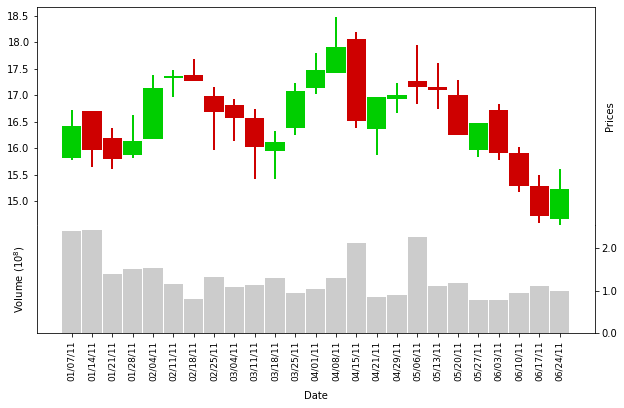

In [4]:
gsk = {'hspace': 0,'height_ratios':[2,1]} #1
fig,(ax1,ax2) = plt.subplots(nrows=2,figsize=(10,6),gridspec_kw=gsk)
bar_height = aa.close-aa.open
line_height = aa.high-aa.low
colormap = clt.ListedColormap(["#ce0000","#00ce00"],name='listed') #2 
colors = np.sign(bar_height)

ax1.bar(x=aa.date,bottom=aa.open,height=bar_height,color=colormap(colors),width=0.95,zorder=10)
ax1.bar(x=aa.date,bottom=aa.low,height=line_height,color=colormap(colors),width=0.1,zorder=10)
ax1.spines.bottom.set_visible(False) #3
ax1.xaxis.set_tick_params(bottom=False,labelbottom=False)
ax1.set_ylabel("Prices",labelpad=10)
ax1.yaxis.set_label_position('right') #4

ax2.bar(x=aa.date,height=aa.volume,color="#CCCCCC",width=0.95,zorder=1)
ax2.yaxis.set_ticks_position('right')
ax2.spines.top.set_visible(False)
ax2.set_xlabel("Date",labelpad=10)
ax2.set_ylabel("Volume ($10^8$)",labelpad=10) #5
ax2.yaxis.set_major_formatter(lambda x, pos: str(x/1e8)) #6
ax2.xaxis.set_tick_params(labelrotation=90,labelsize=9)